<a href="https://colab.research.google.com/github/KauaHenSilva/python_YOLOv11_train/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## importar bibliotecas

In [1]:
%pip install ultralytics --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.4 MB/s eta 0:00:00


In [2]:
# https://drive.google.com/drive/folders/1jcWIoIWlFJ2ocERjW0p2W1cZ4LRMEjM5?hl=pt-br
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import ultralytics
import os
import cv2
import matplotlib.pyplot as plt
import glob

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
ultralytics.checks()
!nvidia-smi

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)
Fri Apr  4 00:02:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default 

## paths

In [5]:
path_obj_zip = "/content/drive/MyDrive/ArquivosCursos/YOLO/recursos/obj.zip"
path_valided_zip = "/content/drive/MyDrive/ArquivosCursos/YOLO/recursos/valid.zip"

path_my_yolo11n = "/content/runs/detect/my_yolo11n"
path_my_yolo11n_val = 'runs/detect/my_yolov11n_modelo_eval'

path_save_models = "/content/drive/MyDrive/Projetos Do GitHub/python_YOLOv11_train/"

path_imgs = "/content/drive/MyDrive/ArquivosCursos/YOLO/imagens"
path_predict = "/content/runs/detect/predict"

arquivo_config = "configs_modelo.yaml"

## Criação do dataset

In [6]:
!rm -rf dataset
!mkdir dataset

!cp "{path_obj_zip}" ./dataset/obj.zip
!cp "{path_valided_zip}" ./dataset/valid.zip

!unzip -q ./dataset/obj.zip -d ./dataset/
!unzip -q ./dataset/valid.zip -d ./dataset/

!rm ./dataset/valid.zip
!rm ./dataset/obj.zip

In [7]:
!mv ./dataset/obj ./dataset/train/

## Config YAML

In [8]:
!touch configs_modelo.yaml

In [9]:
%%writefile configs_modelo.yaml
path: '/content/dataset'
train: 'train/'
val: 'valid/'
test: # opcional

nc: 3
names: ['Apple', 'Coffe Cup', "Horse"]

Overwriting configs_modelo.yaml


# Treinamento modelo

### treinamento por line command

In [11]:
!yolo task=detect mode=train data={arquivo_config} epochs=10

100% 5.35M/5.35M [00:00<00:00, 100MB/s]
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=configs_modelo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

### treinamento por python

In [13]:
model = ultralytics.YOLO('yolo11n.pt')
results = model.train(data=arquivo_config, epochs=10, name='my_yolo11n')

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=configs_modelo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=my_yolo11n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /content/dataset/train.cache... 1498 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1498/1498 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid.cache... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:00<?, ?it/s]


Plotting labels to runs/detect/my_yolo11n/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/my_yolo11n
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.37G       1.09      2.858      1.316         25        640: 100%|██████████| 94/94 [00:38<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.31it/s]

                   all        300        494      0.482      0.361      0.444      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.06G      1.281      2.456      1.469         14        640: 100%|██████████| 94/94 [00:35<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


                   all        300        494      0.356      0.438      0.345      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      3.06G      1.375      2.408      1.547         17        640: 100%|██████████| 94/94 [00:33<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.59it/s]

                   all        300        494      0.313      0.414       0.31      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      3.07G      1.349      2.178      1.533         16        640: 100%|██████████| 94/94 [00:33<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]


                   all        300        494       0.44      0.548      0.472      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      3.07G      1.295      1.949      1.478         21        640: 100%|██████████| 94/94 [00:36<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]


                   all        300        494      0.499       0.52      0.471      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      3.07G      1.218      1.778      1.414         53        640: 100%|██████████| 94/94 [00:32<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.02it/s]

                   all        300        494      0.641      0.579      0.593      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      3.09G       1.17      1.623      1.375         20        640: 100%|██████████| 94/94 [00:34<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]

                   all        300        494       0.66        0.6       0.63      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      3.09G      1.099      1.498      1.322         16        640: 100%|██████████| 94/94 [00:33<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]

                   all        300        494      0.704      0.682      0.717      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.09G      1.043       1.35      1.278         18        640: 100%|██████████| 94/94 [00:33<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


                   all        300        494       0.74      0.661      0.724      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      3.09G     0.9887      1.293      1.238         23        640: 100%|██████████| 94/94 [00:34<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]

                   all        300        494       0.71      0.704      0.739      0.576



10 epochs completed in 0.112 hours.
Optimizer stripped from runs/detect/my_yolo11n/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/my_yolo11n/weights/best.pt, 5.4MB

Validating runs/detect/my_yolo11n/weights/best.pt...
Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.16it/s]


                   all        300        494      0.708      0.702      0.739      0.577
                 Apple        100        231      0.497      0.567       0.55      0.447
             Coffe Cup        100        126      0.869      0.905      0.927      0.763
                 Horse        100        137      0.757      0.635       0.74       0.52
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/my_yolo11n


# Avaliação do modelo

In [29]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [31]:
!yolo task=detect mode=val model={path_my_yolo11n}/weights/best.pt name=my_yolov11n_modelo_eval data=configs_modelo.yaml

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/dataset/valid.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [01:17<00:00,  4.06s/it]
                   all        300        494      0.765      0.645      0.733      0.572
                 Apple        100        231      0.595      0.502      0.546      0.441
             Coffe Cup        100        126      0.917      0.877      0.927      0.764
                 Horse        100        137      0.784      0.555      0.727       0.51
Speed: 4.4ms preprocess, 232.7ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/my_yolov11n_modelo_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


### Exibindo graficos

In [22]:
def mostrar(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

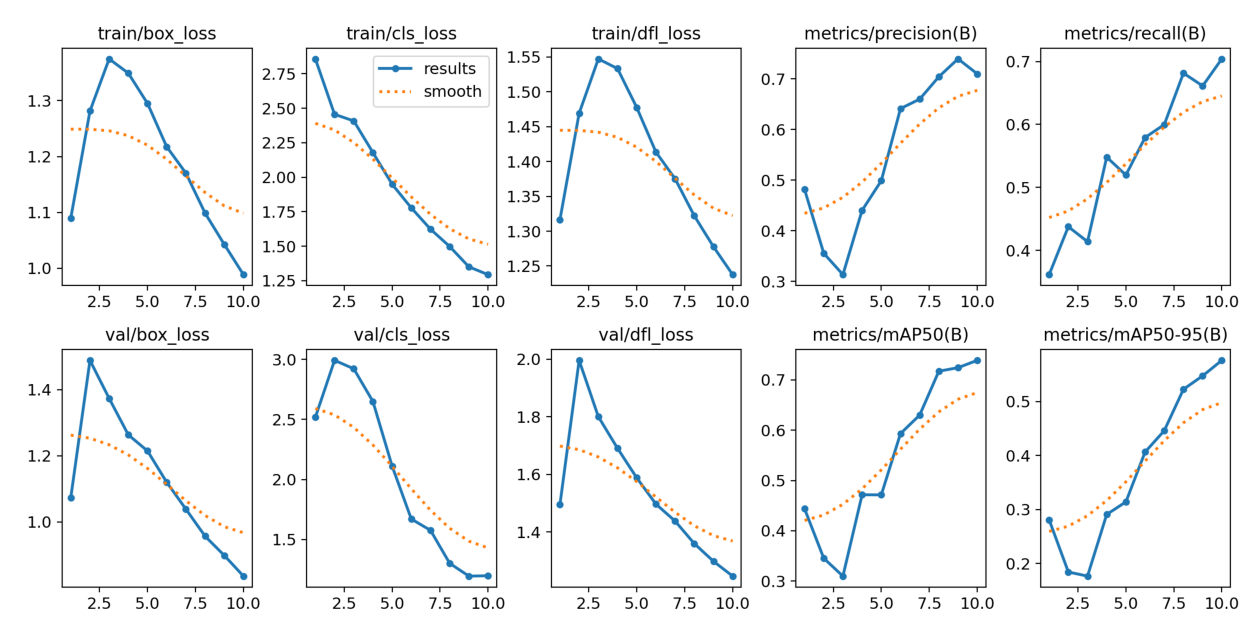

In [23]:
resultados_grafico = cv2.imread(os.path.join(path_my_yolo11n, 'results.png'))
mostrar(resultados_grafico)

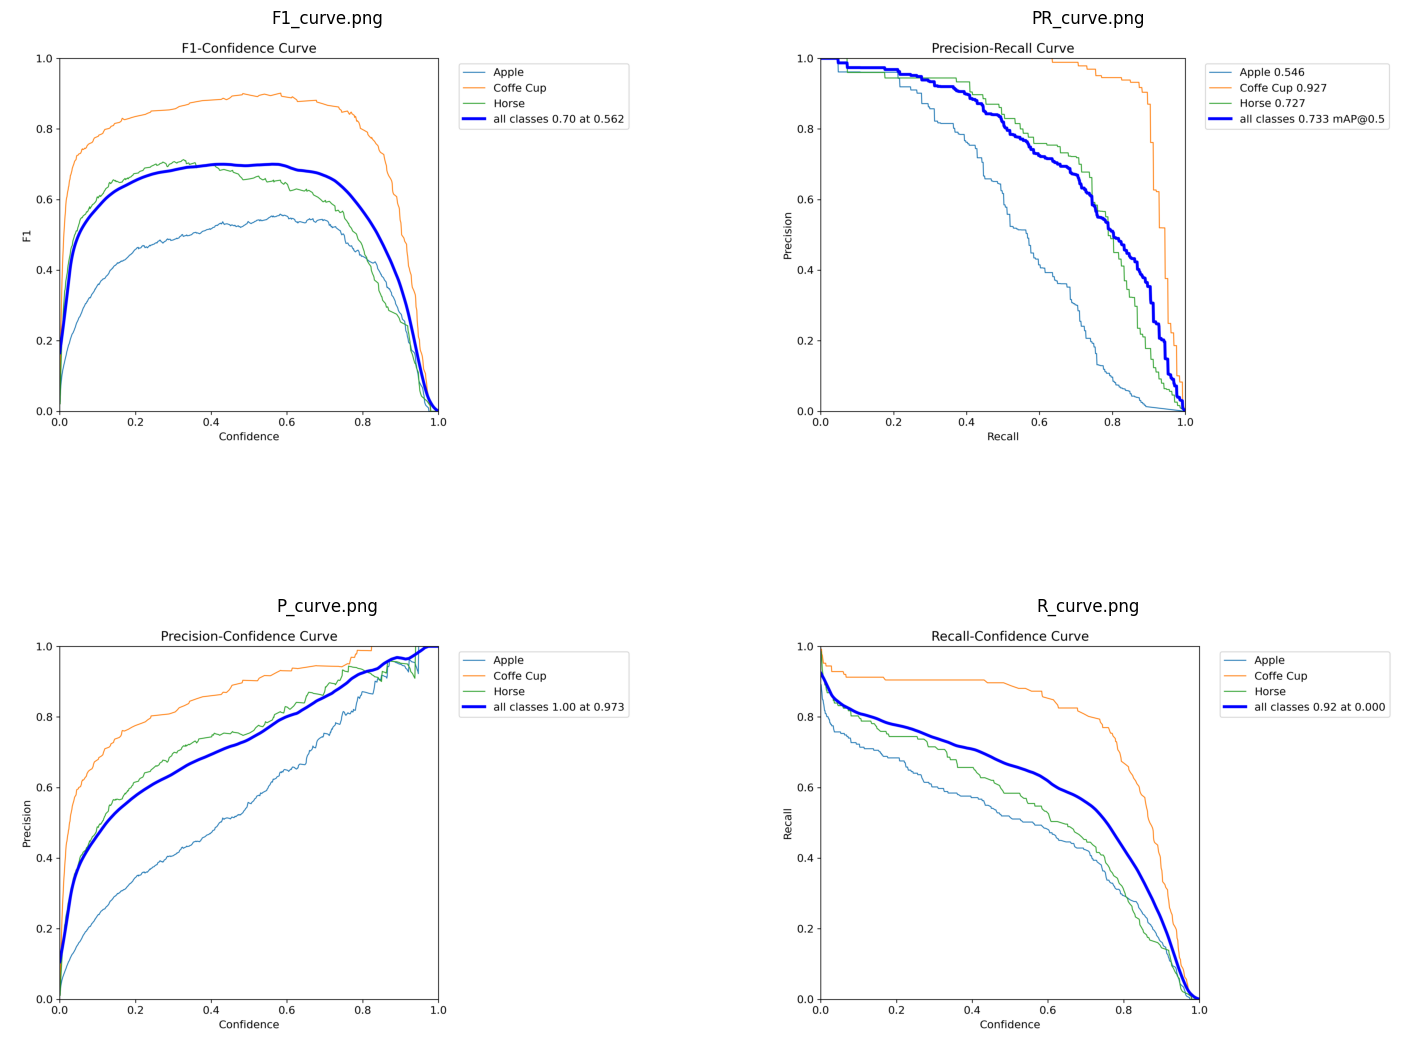

In [32]:
imgs = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
plt.figure(figsize=(18,14))
for i, img in enumerate(imgs):
  grafico = cv2.imread(os.path.join(path_my_yolo11n_val, img))
  grafico = cv2.cvtColor(grafico, cv2.COLOR_BGR2RGB)
  plt.subplot(2, 2, i + 1)
  plt.title(imgs[i])
  plt.imshow(grafico)
  plt.axis('off')
plt.show()

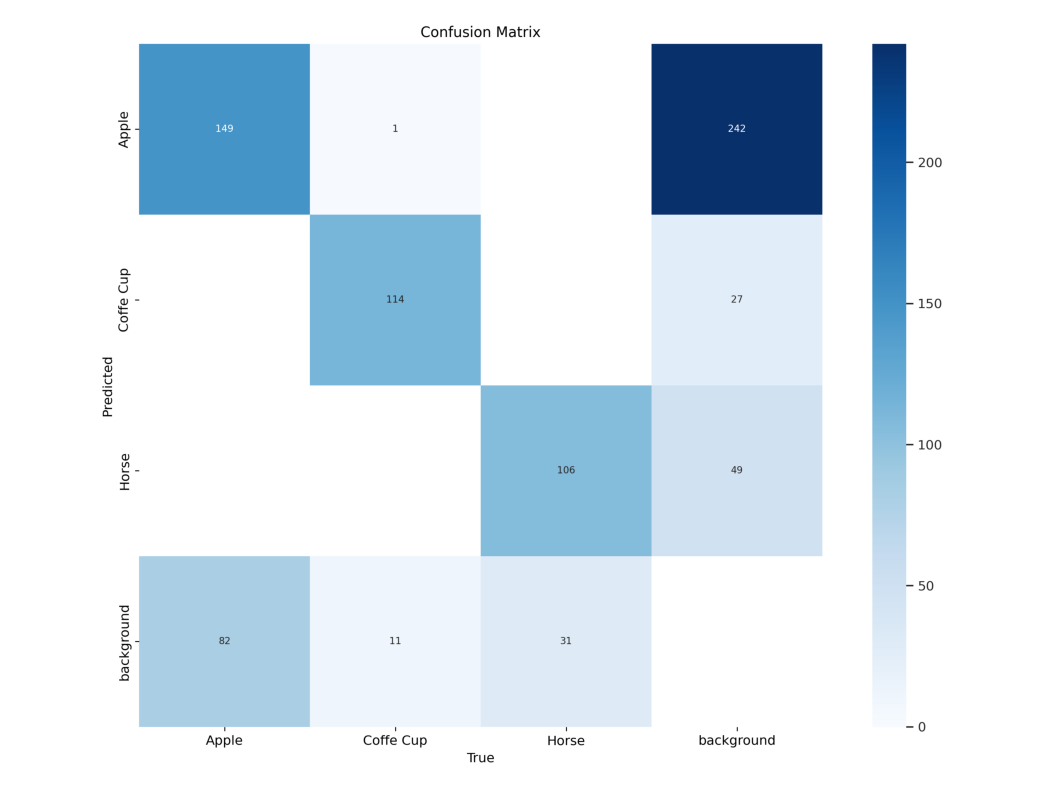

In [40]:
matriz_confusao = cv2.imread(os.path.join(path_my_yolo11n_val, 'confusion_matrix.png'))
mostrar(matriz_confusao)

## Testando

In [12]:
!rm -rf {path_predict}
!yolo task=detect mode=predict model={path_my_yolo11n}/weights/best.pt source={path_imgs} conf=0.5

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/apple.jpg: 448x640 1 Apple, 55.0ms
image 2/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/cachorro_gato.jpg: 608x640 1 Horse, 67.8ms
image 3/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/cachorros.jpg: 448x640 2 Horses, 12.5ms
image 4/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/cachorros02.jpg: 448x640 2 Horses, 15.9ms
image 5/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/caneca01.jpg: 384x640 1 Coffe Cup, 43.8ms
image 6/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/img-canecas.jpg: 480x640 6 Coffe Cups, 41.9ms
image 7/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/resultado.jpg: 448x640 2 Horses, 9.7ms
image 8/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/resultado_cachorro.jpg: 448x640 1 Horse, 9.0ms
Speed: 4.5m

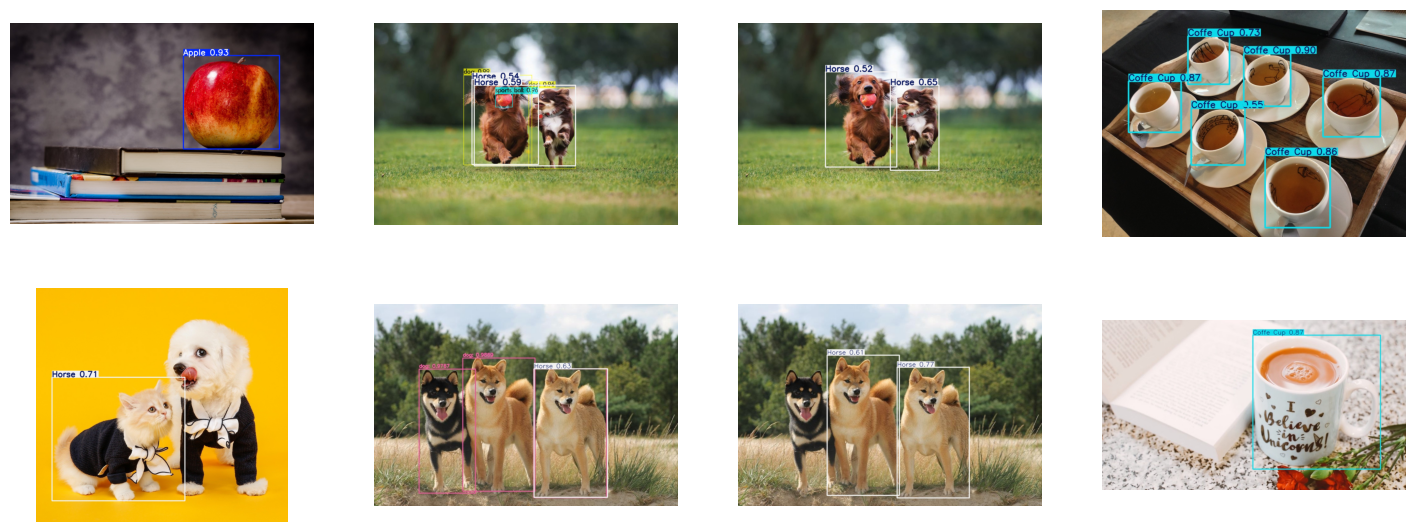

In [13]:
plt.figure(figsize=(18,14))
for i, img in enumerate(glob.glob(path_predict + '/*.jpg')):
  img = cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(4, 4, i + 1)
  plt.imshow(img)
  plt.axis('off')

plt.show()


## Continuando Treinamento

In [16]:
!rm -rf /content/runs/detect/train

In [15]:
!yolo task=detect mode=train model={path_my_yolo11n}/weights/last.pt data={arquivo_config} epochs=10 name='my_yolo11n'


Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/my_yolo11n/weights/last.pt, data=configs_modelo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=my_yolo11n2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

In [17]:
!yolo task=detect mode=val model={path_my_yolo11n}2/weights/best.pt name=my_yolov11n_modelo_eval data={arquivo_config}

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/dataset/valid.cache... 300 images, 0 backgrounds, 0 corrupt: 100% 300/300 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 19/19 [00:06<00:00,  3.06it/s]
                   all        300        494      0.722       0.72      0.741      0.593
                 Apple        100        231       0.51      0.567      0.569      0.471
             Coffe Cup        100        126       0.91      0.878      0.928      0.774
                 Horse        100        137      0.747      0.715      0.726      0.534
Speed: 1.2ms preprocess, 7.6ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/my_yolov11n_modelo_eval
💡 Learn more at https://docs.ultralytics.com/modes/val


## Testando

In [18]:
!rm -rf {path_predict}
!yolo task=detect mode=predict model={path_my_yolo11n}2/weights/best.pt source={path_imgs} conf=0.5

Ultralytics 8.3.101 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

image 1/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/apple.jpg: 448x640 1 Apple, 43.7ms
image 2/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/cachorro_gato.jpg: 608x640 1 Horse, 45.1ms
image 3/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/cachorros.jpg: 448x640 2 Horses, 9.0ms
image 4/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/cachorros02.jpg: 448x640 (no detections), 8.6ms
image 5/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/caneca01.jpg: 384x640 1 Coffe Cup, 43.6ms
image 6/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/img-canecas.jpg: 480x640 6 Coffe Cups, 41.4ms
image 7/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/resultado.jpg: 448x640 1 Horse, 9.1ms
image 8/8 /content/drive/MyDrive/ArquivosCursos/YOLO/imagens/resultado_cachorro.jpg: 448x640 2 Horses, 8.2ms
Speed:

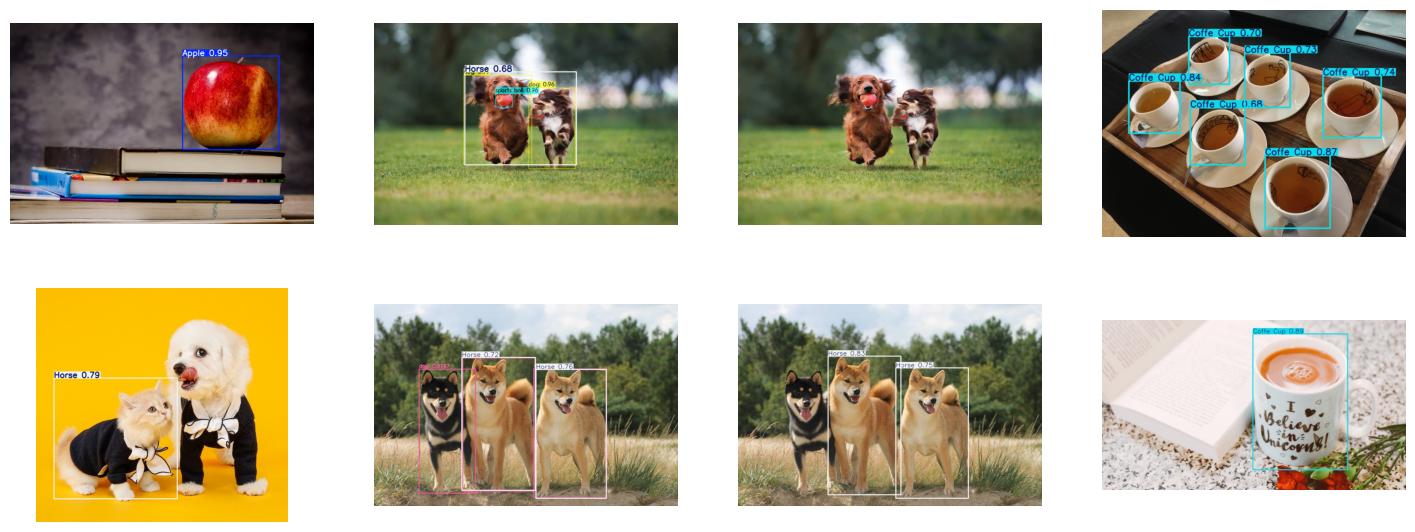

In [19]:
plt.figure(figsize=(18,14))
for i, img in enumerate(glob.glob(path_predict + '/*.jpg')):
  img = cv2.imread(img)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(4, 4, i + 1)
  plt.imshow(img)
  plt.axis('off')

plt.show()


# Salvando carregar modelo

## Salvar

In [35]:
!cp -r {path_my_yolo11n} "/content/drive/MyDrive/Projetos Do GitHub/python_YOLOv11_train/"
!cp -r {path_my_yolo11n_val} "/content/drive/MyDrive/Projetos Do GitHub/python_YOLOv11_train/"

## Carregar

In [11]:
!mkdir -p runs/detect
!cp -r "/content/drive/MyDrive/Projetos Do GitHub/python_YOLOv11_train/" "runs/detect"
!mv "/content/runs/detect/python_YOLOv11_train/my_yolo11n" "/content/runs/detect"
!mv "/content/runs/detect/python_YOLOv11_train/my_yolov11n_modelo_eval" "/content/runs/detect"
!rm -rf "/content/runs/detect/python_YOLOv11_train"

mv: cannot stat '/content/runs/detect/python_YOLOv11_train/yolov8s_modelo_eval': No such file or directory
